<a href="https://colab.research.google.com/github/amazzoli/ComponentSystemsData/blob/main/datasets/proteomes/inspect_components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cloning the repository in the colab folder structure
%%bash
git clone https://github.com/amazzoli/ComponentSystemsData.git

Cloning into 'ComponentSystemsData'...


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys

# Changing directory where the notebook is placed
os.chdir('/content/ComponentSystemsData/datasets/proteomes')

sys.path.append('/content/ComponentSystemsData/py_utils/')
import plot_utils as pu

# Inspecting proteomes components: **protein families**

The table `components.tsv` contains information about protein families:

- **sparse_id**: identifier of the matrix coordinates in the sparse representation.
- **family_id**: identifier of the Pfam database https://www.ebi.ac.uk/interpro/entry/pfam/#table.
- **abundance**: number of protein istances appearing in the all the bacterial genomes.
- **occurrence**: number of genomes in which the family is present.

In [3]:
components = pd.read_csv('data/components.tsv', sep='\t', index_col=0)
components

,family_id,abundance,occurrence
sparse_id,,,
0,PF00002,1,1
1,PF00004,69222,8334
2,PF00005,612659,8342
3,PF00006,32657,8310
4,PF00008,13,9
...,...,...,...
14688,PF25800,1212,1002
14689,PF25815,3,1
14690,PF25816,1073,682


### Abundance statistics
Ranked abundances (Zipf's law) and abundance distribution

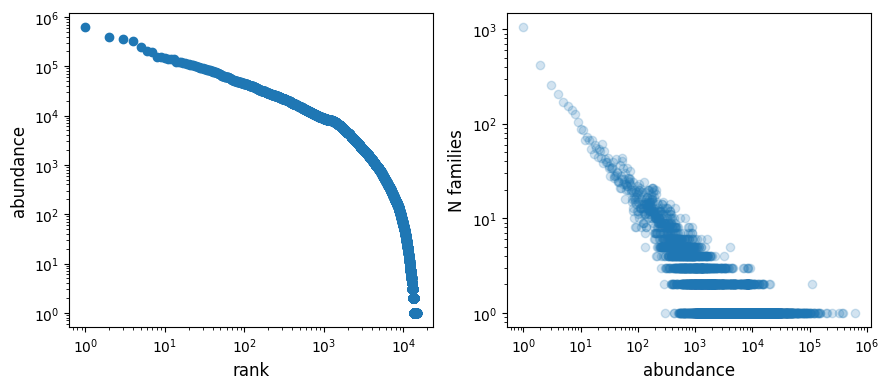

In [4]:
abundances = components.abundance.values

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,4))

ax1 = pu.plot_count_rank(ax1, abundances, ylabel='abundance')

ax2 = pu.plot_count_hist_nobin(ax2, abundances, alpha=0.2, xlabel='abundance', ylabel='N families')

plt.tight_layout()

### Sharing statistics

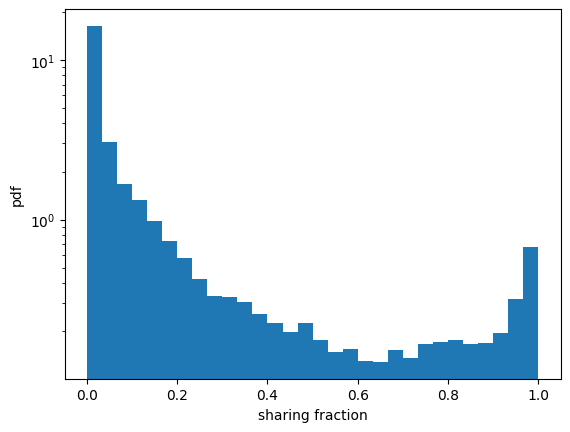

In [5]:
sharing_frac = components.occurrence / max(components.occurrence)

plt.yscale('log')
plt.xlabel('sharing fraction')
plt.ylabel('pdf')
h = plt.hist(sharing_frac, bins=30, density=True)